#### NORMAL EQUATION

In [1]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor

In [56]:
df = pd.read_csv(r"./data/house-prices-advanced-regression-techniques/train.csv")
df.shape

(1460, 81)

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
y = df['SalePrice']
X = df.loc[:, ('YearBuilt', 'OverallQual')]

<Figure size 432x288 with 0 Axes>

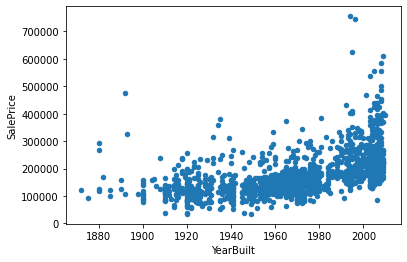

In [5]:
plt.figure()
df.plot.scatter(x="YearBuilt", y="SalePrice");

<Figure size 432x288 with 0 Axes>

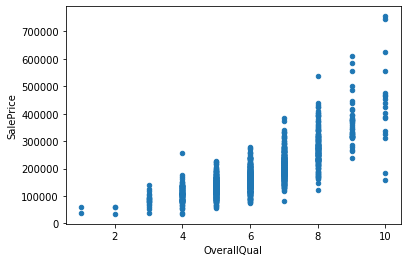

In [6]:
plt.figure()
df.plot.scatter(x="OverallQual", y="SalePrice");

In [58]:
n = X.shape[1]
m = X.shape[0]
W = np.random.uniform(size=(1, n+1))
y = y.to_numpy()
X.loc[:,'b'] = 1
X = X.to_numpy()

In [59]:
W.shape

(1, 3)

In [39]:
X.shape

(1460, 3)

In [9]:
def calculate_optim_theta(X: ndarray, Y: ndarray) -> ndarray:
    a = X.T.dot(X)
    b = np.linalg.inv(a)
    c = b.dot(X.T)
    d = c.dot(y)
    return d

#worth consideration:
#https://stackoverflow.com/questions/34170618/normal-equation-and-numpy-least-squares-solve-methods-difference-in-regress

In [60]:
result = calculate_optim_theta(X, y)
result.shape

(3,)

In [11]:
def h(W: ndarray, X: ndarray) -> float:
    return np.dot(W, X)

In [12]:
df = pd.read_csv(r"./data/house-prices-advanced-regression-techniques/test.csv")
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
X_test = df.loc[:, ('YearBuilt', 'OverallQual')]
X_test.loc[:,'b'] = 1
X_test = X_test.to_numpy()

In [61]:
results = np.array([h(result, x) for x in X_test])
results.shape

(1459,)

In [44]:
# count optim theta with usage of transpose
def transpose_method(X: ndarray, Y: ndarray) -> ndarray:
    a = X.T.dot(Y)
    b = np.linalg.inv(X.T.dot(X))
    return a.dot(b)[np.newaxis, :]

In [45]:
W_tran_method = transpose_method(X,y)
W_tran_method.shape

(1, 3)

In [53]:
results_tran = np.array([h(W_tran_method, x) for x in X_test])
results_tran.shape

(1459, 1)

In [50]:
np.subtract(results_tran, results)

array([[ 2.14437023e-07, -4.11799631e+04, -9.88529005e+03, ...,
         2.74591390e+02, -8.51233310e+03, -9.27943990e+04],
       [ 4.11799631e+04,  2.15484761e-07,  3.12946730e+04, ...,
         4.14545545e+04,  3.26676300e+04, -5.16144359e+04],
       [ 9.88529005e+03, -3.12946730e+04,  2.18045898e-07, ...,
         1.01598814e+04,  1.37295695e+03, -8.29091090e+04],
       ...,
       [-2.74591390e+02, -4.14545545e+04, -1.01598814e+04, ...,
         2.14320607e-07, -8.78692449e+03, -9.30689904e+04],
       [ 8.51233310e+03, -3.26676300e+04, -1.37295695e+03, ...,
         8.78692449e+03,  2.17580236e-07, -8.42820659e+04],
       [ 9.27943990e+04,  5.16144359e+04,  8.29091090e+04, ...,
         9.30689904e+04,  8.42820659e+04,  2.20490620e-07]])